PART 1 — Import Libraries

In [8]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

sns.set(style="whitegrid")

PART 2 — Load Dataset

In [9]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("SVMtrain.csv")
df.head()


Saving SVMtrain.csv to SVMtrain (3).csv


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3


PART 3 — Basic Info

In [10]:
print("Dataset Info:\n")
df.info()

print("\nMissing Values:\n")
print(df.isnull().sum())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.6+ KB

Missing Values:

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


PART 4 — Data Cleaning

In [12]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())


#Convert categorical to numeric (if needed):
df = pd.get_dummies(df, drop_first=True)
df.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female
0,1,0,3,22.0,1,0,7.2500,3,False
1,2,1,1,38.0,1,0,71.2833,1,True
2,3,1,3,26.0,0,0,7.9250,3,True
3,4,1,1,35.0,1,0,53.1000,3,True
4,5,0,3,35.0,0,0,8.0500,3,False


PART 5 — Split Data

In [13]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

PART 6 — Scaling

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

PART 7 — Model Training & Evaluation

In [15]:
#Support Vector Machine (SVM)
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(confusion_matrix(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

SVM Accuracy: 0.8146067415730337
[[92 17]
 [16 53]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       109
           1       0.76      0.77      0.76        69

    accuracy                           0.81       178
   macro avg       0.80      0.81      0.81       178
weighted avg       0.82      0.81      0.81       178



In [16]:
#Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

Logistic Regression Accuracy: 0.7921348314606742
[[88 21]
 [16 53]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       109
           1       0.72      0.77      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.79      0.78       178
weighted avg       0.80      0.79      0.79       178



In [17]:
#K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

KNN Accuracy: 0.797752808988764
[[91 18]
 [18 51]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       109
           1       0.74      0.74      0.74        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



In [18]:
#Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

Decision Tree Accuracy: 0.7359550561797753
[[83 26]
 [21 48]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       109
           1       0.65      0.70      0.67        69

    accuracy                           0.74       178
   macro avg       0.72      0.73      0.73       178
weighted avg       0.74      0.74      0.74       178



In [19]:
#Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.7921348314606742
[[91 18]
 [19 50]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       109
           1       0.74      0.72      0.73        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



PART 8 — Compare All Models

In [27]:
model_scores = {
    "SVM": accuracy_score(y_test, svm_pred),
    "Logistic Regression": accuracy_score(y_test, lr_pred),
    "KNN": accuracy_score(y_test, knn_pred),
    "Decision Tree": accuracy_score(y_test, dt_pred),
    "Random Forest": accuracy_score(y_test, rf_pred)
}

model_scores

{'SVM': 0.8146067415730337,
 'Logistic Regression': 0.7921348314606742,
 'KNN': 0.797752808988764,
 'Decision Tree': 0.7359550561797753,
 'Random Forest': 0.7921348314606742}

Calculate All Model Accuracies First

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# SVM Model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [30]:
from sklearn.metrics import accuracy_score

# Logistic Regression Accuracy
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

# SVM Accuracy
y_pred_svm = svm_model.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)

# Random Forest Accuracy
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

# KNN Accuracy
y_pred_knn = knn_model.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)

print("Logistic Regression:", acc_lr)
print("SVM:", acc_svm)
print("Random Forest:", acc_rf)
print("KNN:", acc_knn)


Logistic Regression: 0.7921348314606742
SVM: 0.8146067415730337
Random Forest: 0.797752808988764
KNN: 0.797752808988764


PART 9 — Select Best Model

In [33]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "SVM", "Random Forest", "KNN"],
    "Accuracy": [acc_lr, acc_svm, acc_rf, acc_knn]
})

best_model = results.loc[results["Accuracy"].idxmax()]
print("Best Model:\n", best_model)


Best Model:
 Model            SVM
Accuracy    0.814607
Name: 1, dtype: object


STEP 10 — Compare All Models in a Table

In [34]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "SVM", "Random Forest", "KNN"],
    "Accuracy": [acc_lr, acc_svm, acc_rf, acc_knn]
})

results

,Model,Accuracy
0,Logistic Regression,0.792135
1,SVM,0.814607
2,Random Forest,0.797753
3,KNN,0.797753


STEP 11 — Visualize the Comparison

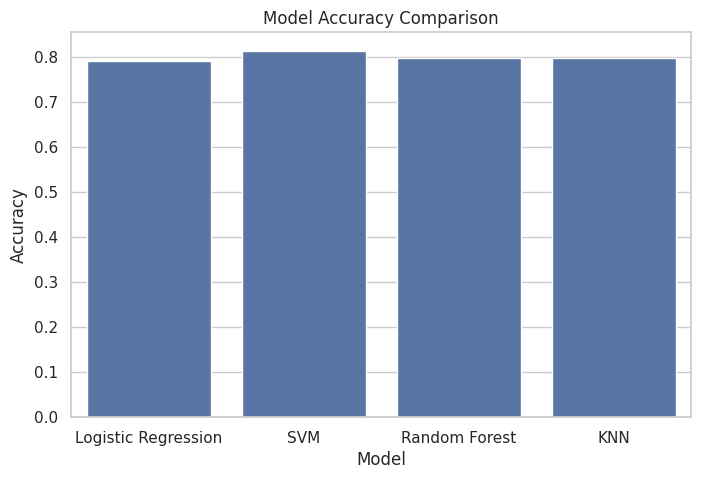

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(data=results, x="Model", y="Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()

STEP 12 — Make Final Predictions with Best Model

In [36]:
final_model = rf_model
y_pred_final = final_model.predict(X_test)

STEP 13 — Generate Final Classification Report

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       109
           1       0.74      0.74      0.74        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178

